<p style = "font-size : 45px; color : #564a4a ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Medical Cost EDA and Regression using TensorFlow</strong></p>

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# reading data

df = pd.read_csv(r'C:\Users\User\Music\DL and ML Practical Tutorials - Package\Python myprojects\Medical Cost EDA + Regression (TensorFlow)\insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


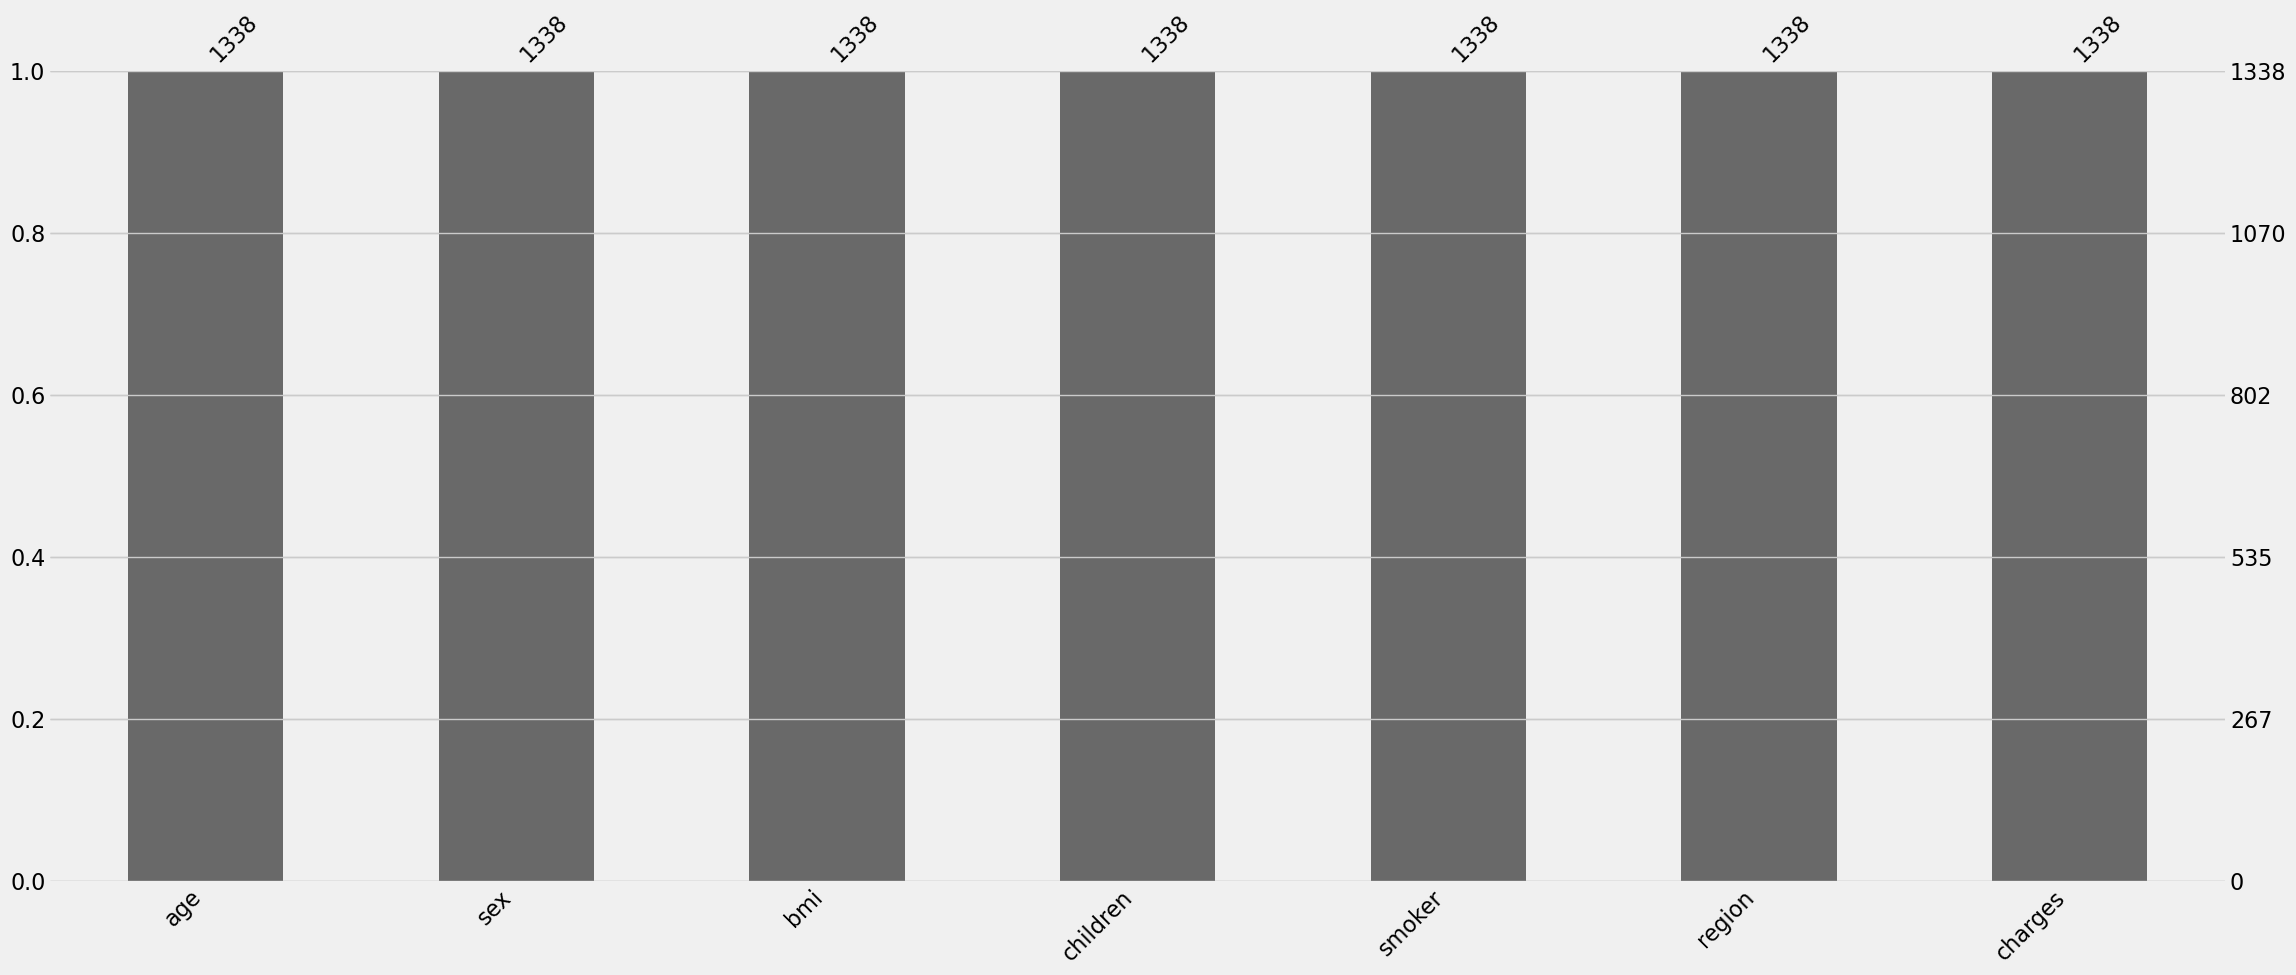

In [6]:
# looking for missing values

import missingno as msno
msno.bar(df)
plt.show()

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>There are no missing values in the data.</strong></p> 

<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

In [7]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


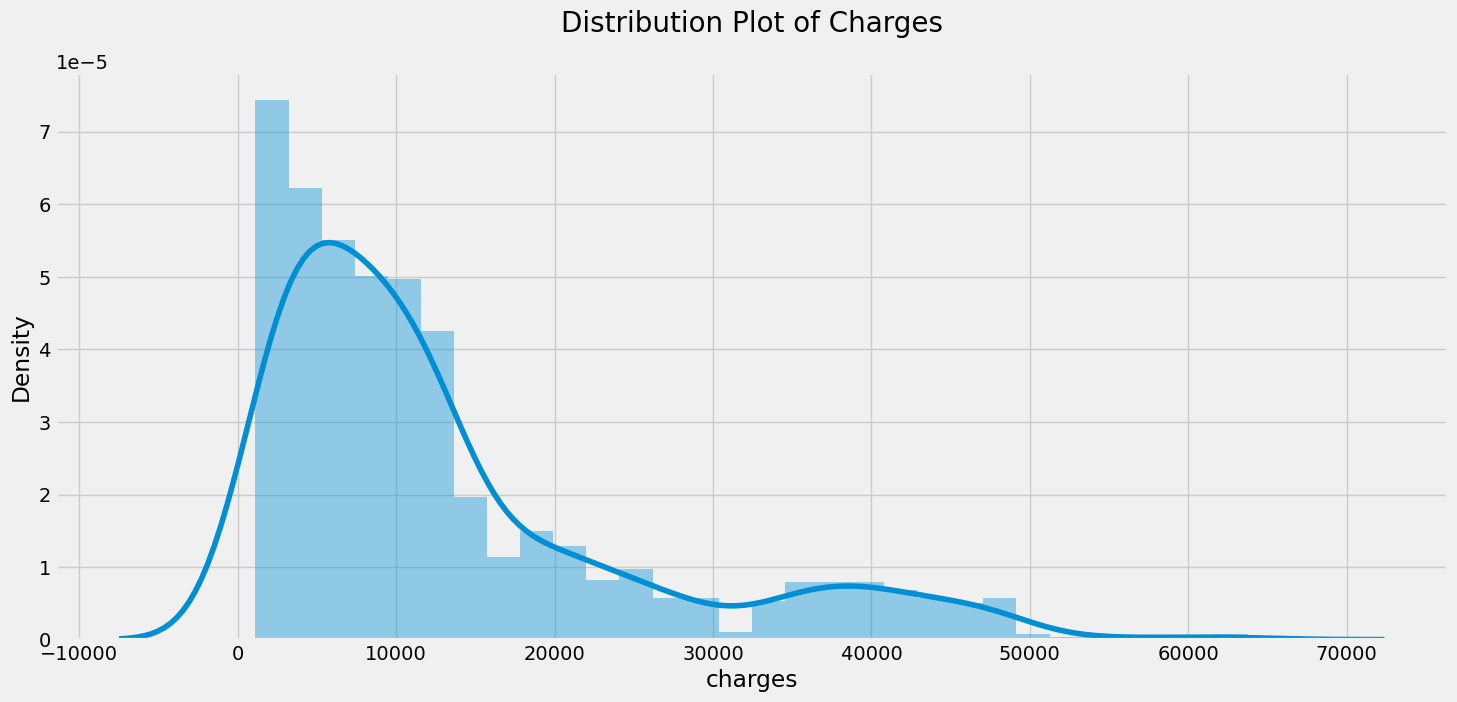

In [9]:
# distribution plot of charges column

plt.figure(figsize = (16, 7))
sns.distplot(df['charges'])
plt.title('Distribution Plot of Charges\n', fontsize =  20)
plt.show()

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>From above plot we can say that Charges mainly lies under 15000</strong></p> 

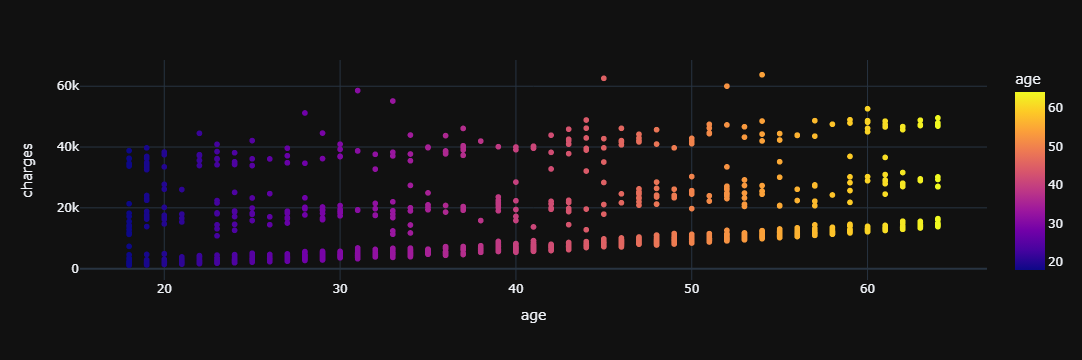

In [10]:
px.scatter(data_frame = df, x = 'age', y = 'charges', color = 'age', template = 'plotly_dark')

In [11]:
age_18_25 = df.age[(df.age >= 18) & (df.age <= 25)]
age_26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age_36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age_46_55 = df.age[(df.age >= 46) & (df.age <= 55)]
age_55above = df.age[df.age >= 55]

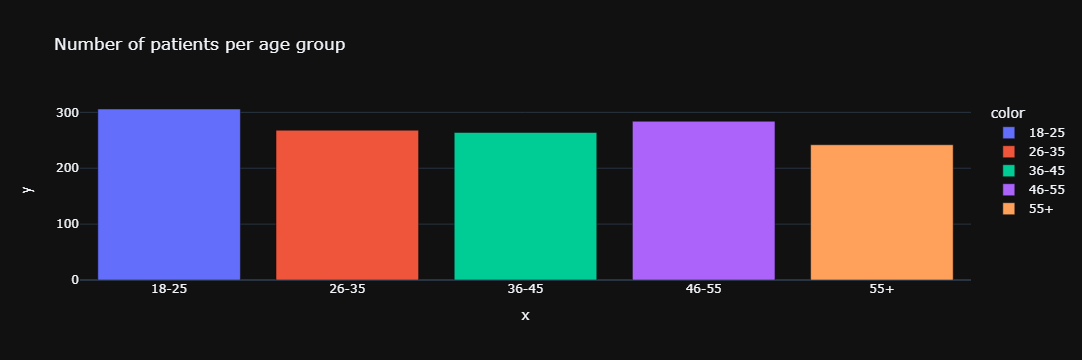

In [12]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age, template = 'plotly_dark',
       title = 'Number of patients per age group')

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>We can say that there is some relation between age and charges, as the age increases charges also increases.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Surprisingly age group 18-25 have the highest patients.</strong></li>
</ul>

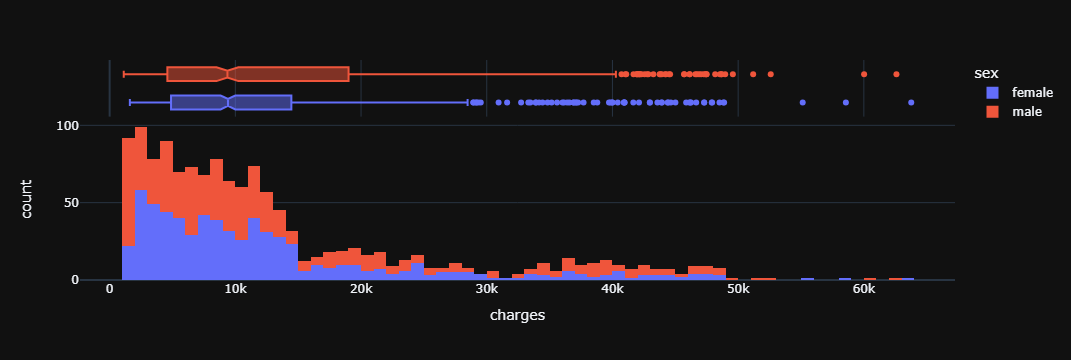

In [13]:
px.histogram(data_frame = df, x = 'charges', nbins = 100, color = 'sex', marginal = 'box',
             template = 'plotly_dark')

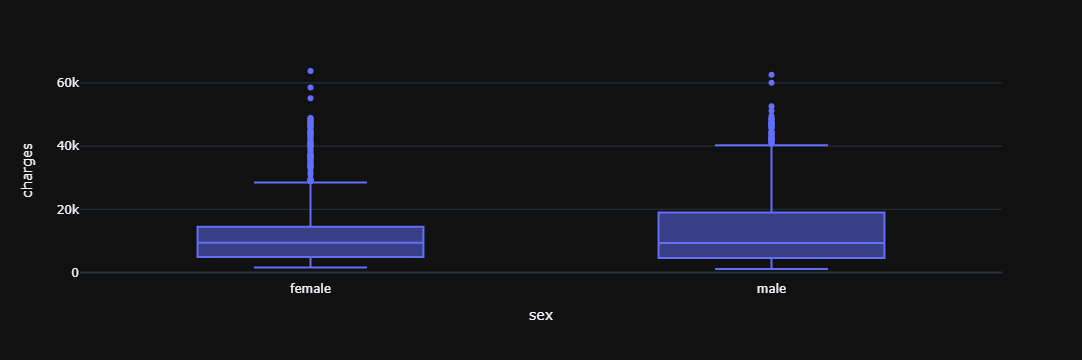

In [14]:
px.box(x = 'sex', y = 'charges', data_frame = df, template = 'plotly_dark')

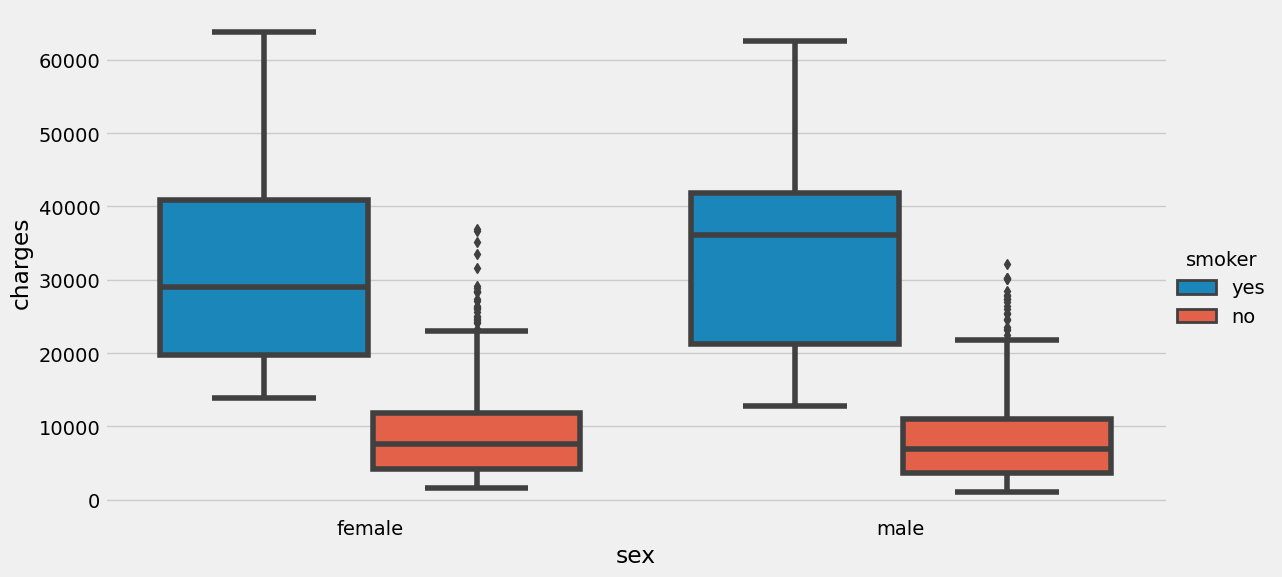

In [15]:
sns.catplot(x = 'sex', y = 'charges', hue = 'smoker', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

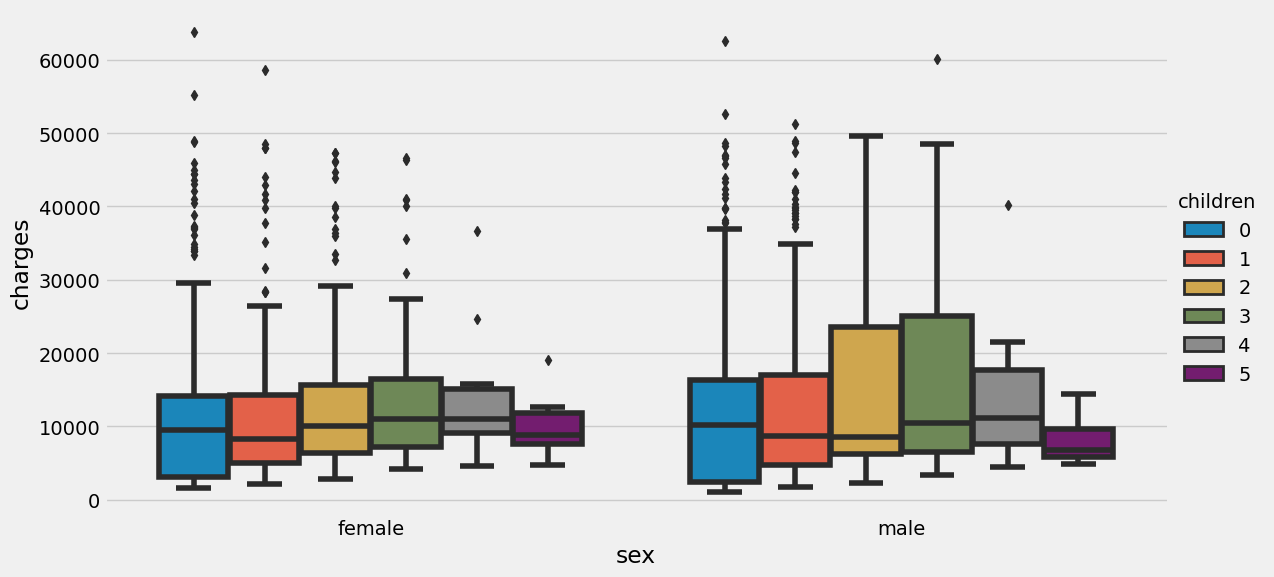

In [16]:
sns.catplot(x = 'sex', y = 'charges', hue = 'children', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

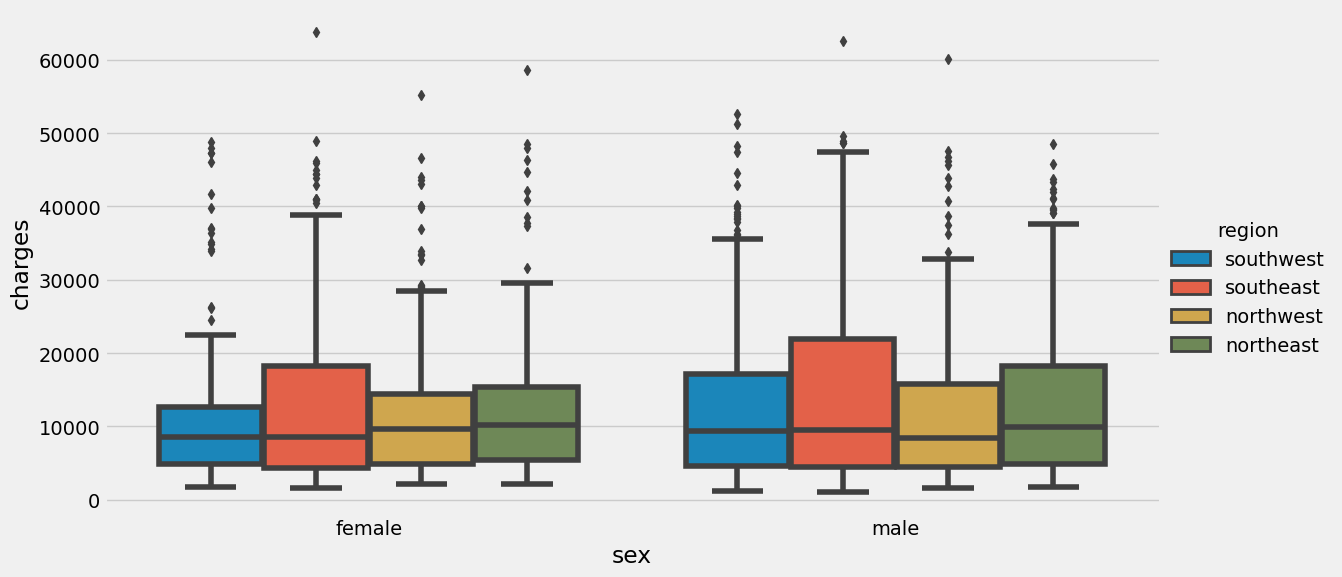

In [17]:
sns.catplot(x = 'sex', y = 'charges', hue = 'region', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Charges for male patients have high charges than female patients.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>No significant effect of smoker or non smoker on charges of males and females.</strong></li>    
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Males having 2, 3 or 4 children have relatively high charges.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>charges of patients from southeast region have the highest charges.</strong></li>    
</ul>

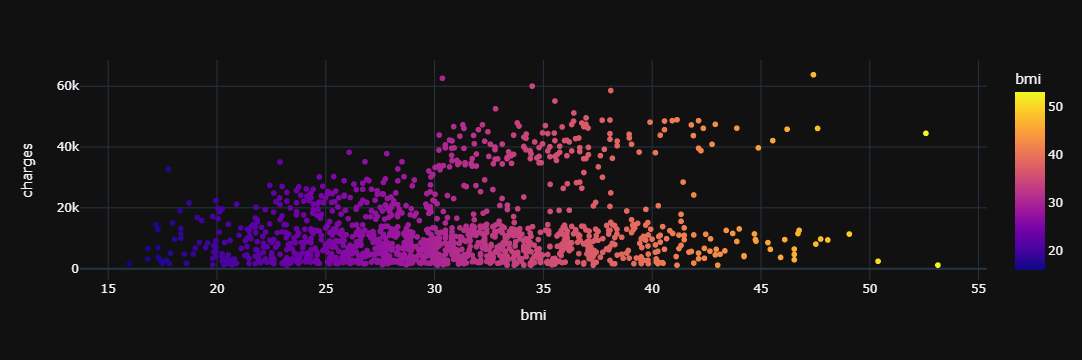

In [18]:
px.scatter(data_frame = df, x = 'bmi', y = 'charges', color = 'bmi', template = 'plotly_dark')

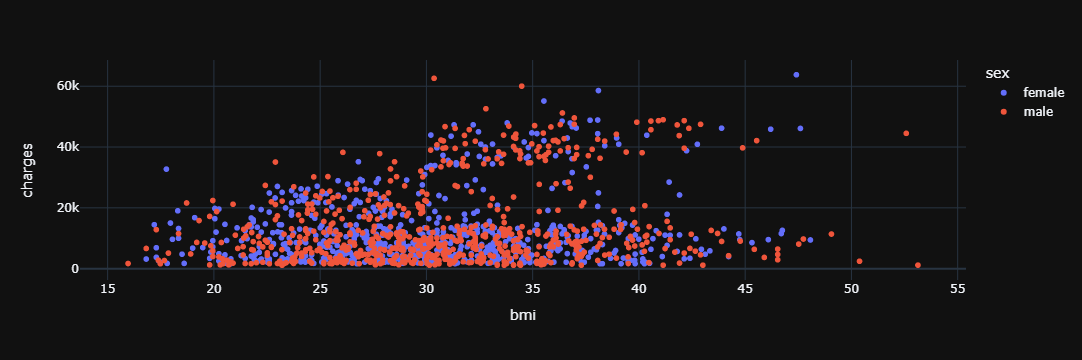

In [19]:
px.scatter(data_frame = df, x = 'bmi', y = 'charges', color = 'sex', template = 'plotly_dark')

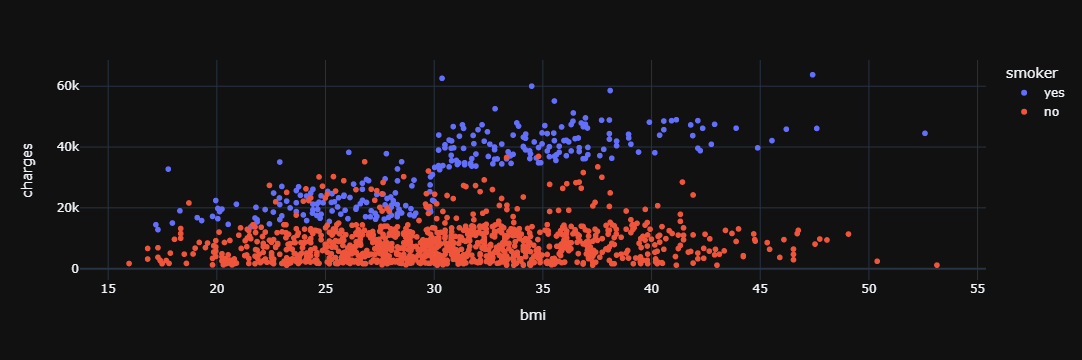

In [20]:
px.scatter(data_frame = df, x = 'bmi', y = 'charges', color = 'smoker', template = 'plotly_dark')

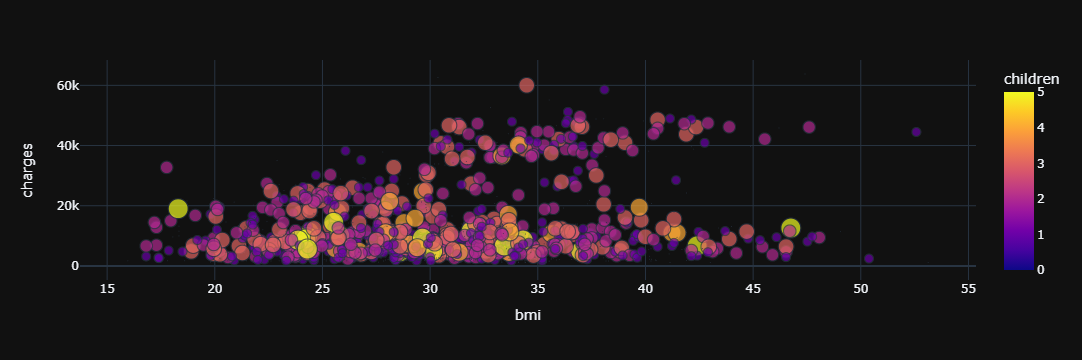

In [21]:
px.scatter(data_frame = df, x = 'bmi', y = 'charges', color = 'children', size = 'children',
           template = 'plotly_dark')

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>bmi have slightly correlation with charges, as bmi increases charges may also increase.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Patients who smoke have high bmi and high charges.</strong></li>
</ul>

In [22]:
df_child = df.groupby(['children'])['charges'].mean().reset_index()
df_child

children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247

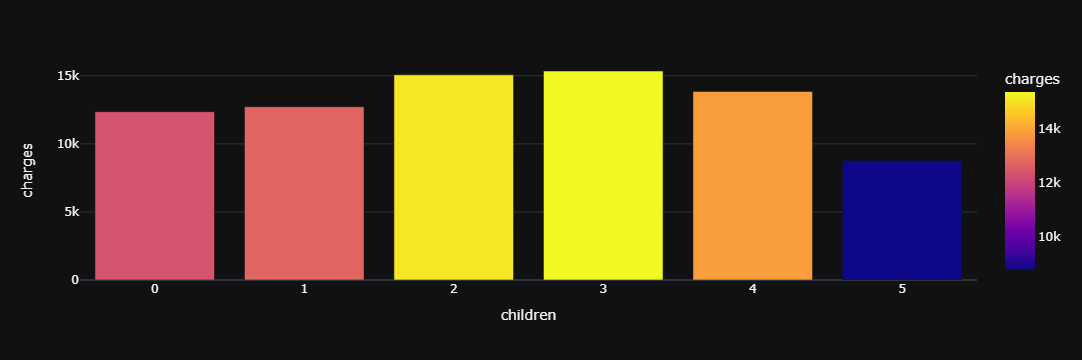

In [23]:
px.bar(data_frame = df_child, x = 'children', y = 'charges', color = 'charges',
       template = 'plotly_dark')

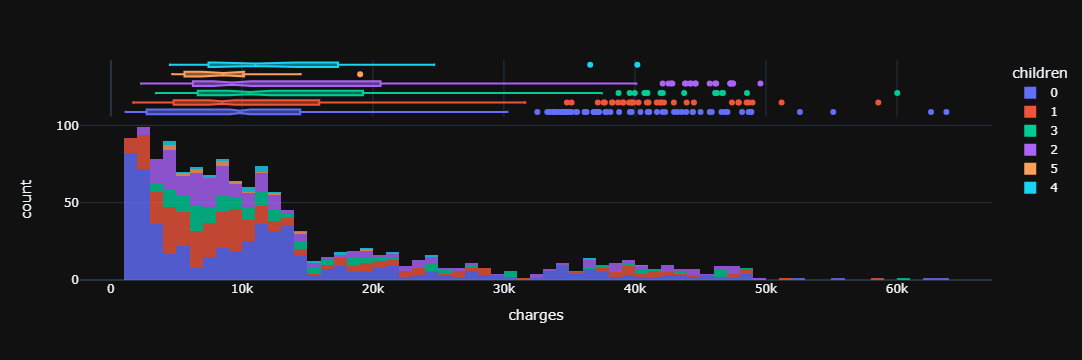

In [24]:
px.histogram(data_frame = df, x = 'charges', nbins = 100, color = 'children', marginal = 'box',
             template = 'plotly_dark', opacity = 0.8)

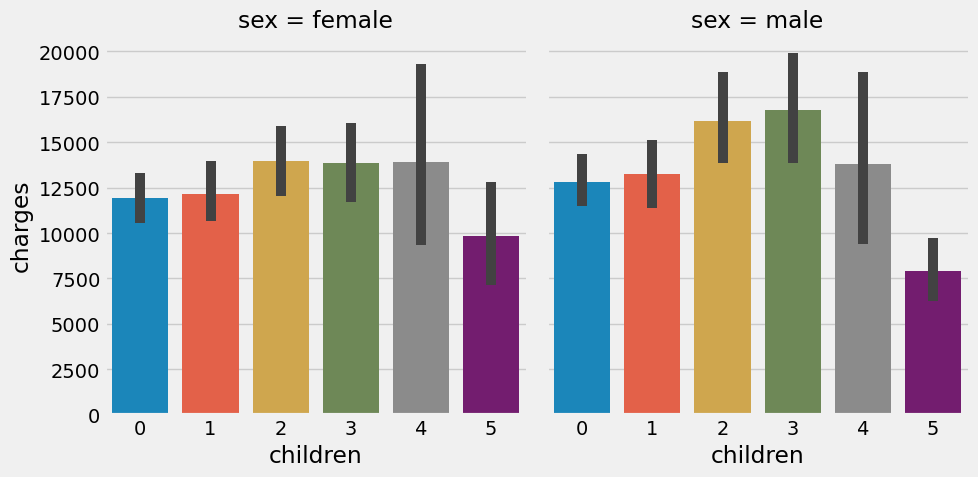

In [25]:
sns.catplot(x = 'children', y = 'charges', col = 'sex', data = df, kind = 'bar')
plt.show()

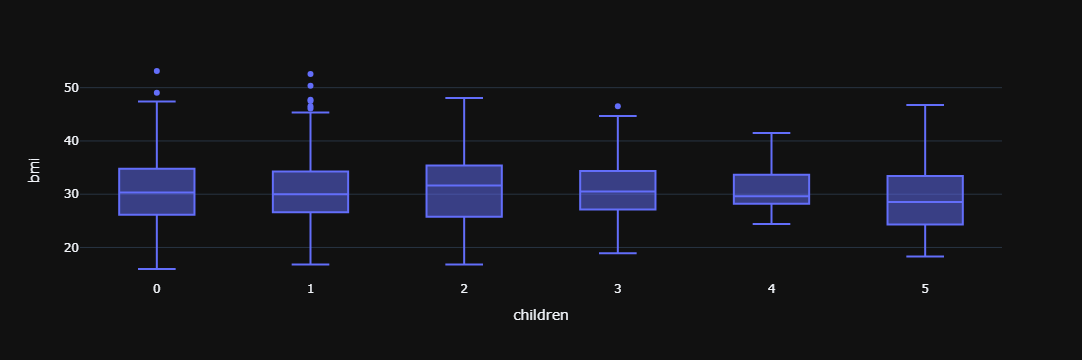

In [26]:
px.box(x = 'children', y = 'bmi', data_frame = df, template = 'plotly_dark')

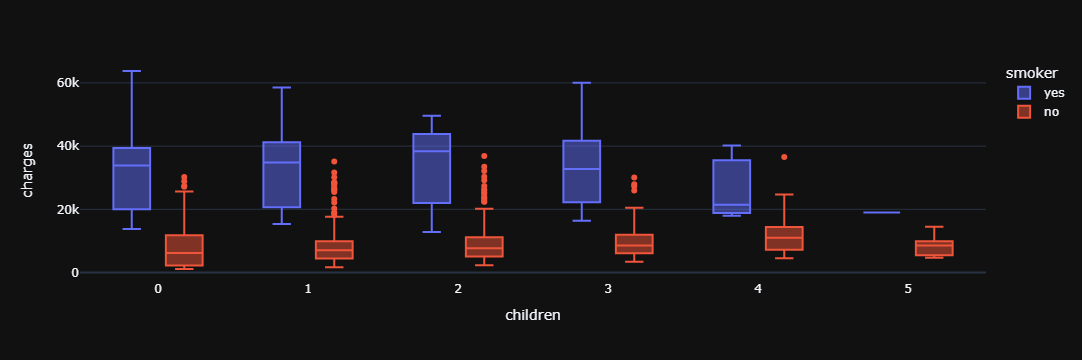

In [27]:
px.box(x = 'children', y = 'charges', color = 'smoker', data_frame = df, template = 'plotly_dark')

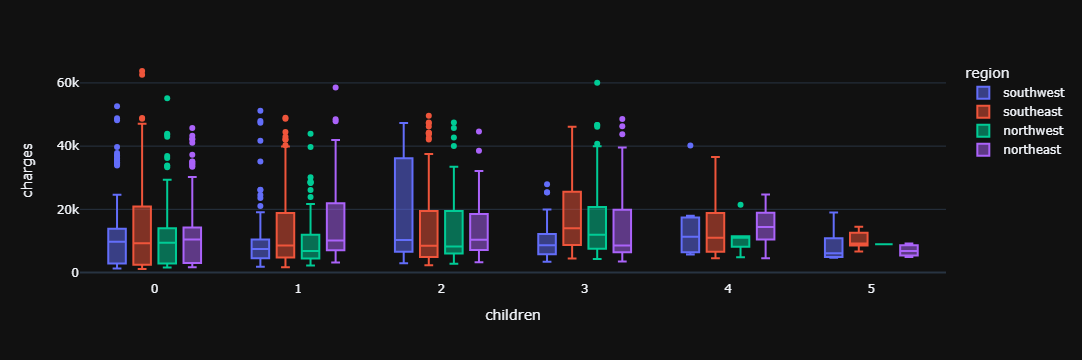

In [28]:
px.box(x = 'children', y = 'charges', color = 'region', data_frame = df, template = 'plotly_dark')

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Patients having 2/3 children have the highest average charges may be because patients having 2/3 children are also smoker.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Male patients having children have high charges than female patients.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Highest patients having 2 children are from southwest region.</strong></li>
</ul>

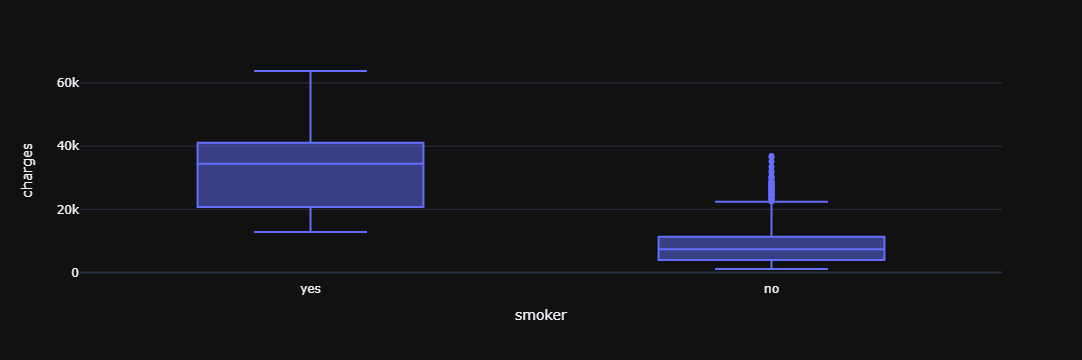

In [29]:
px.box(x = 'smoker', y = 'charges', data_frame = df, template = 'plotly_dark')

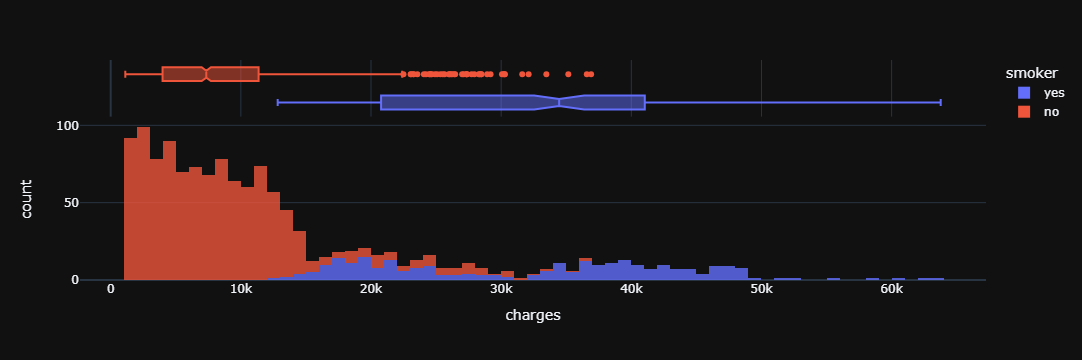

In [30]:
px.histogram(data_frame = df, x = 'charges', nbins = 100, color = 'smoker', marginal = 'box',
             template = 'plotly_dark', opacity = 0.8)

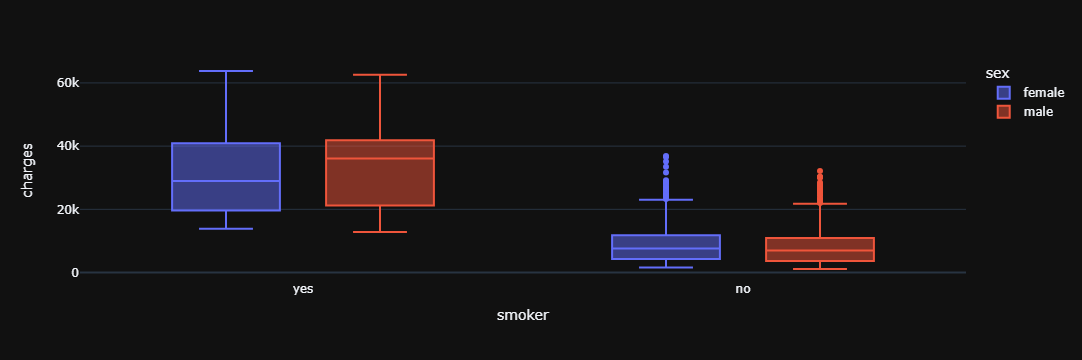

In [31]:
px.box(data_frame = df, x = 'smoker', y = 'charges', color = 'sex', template = 'plotly_dark')

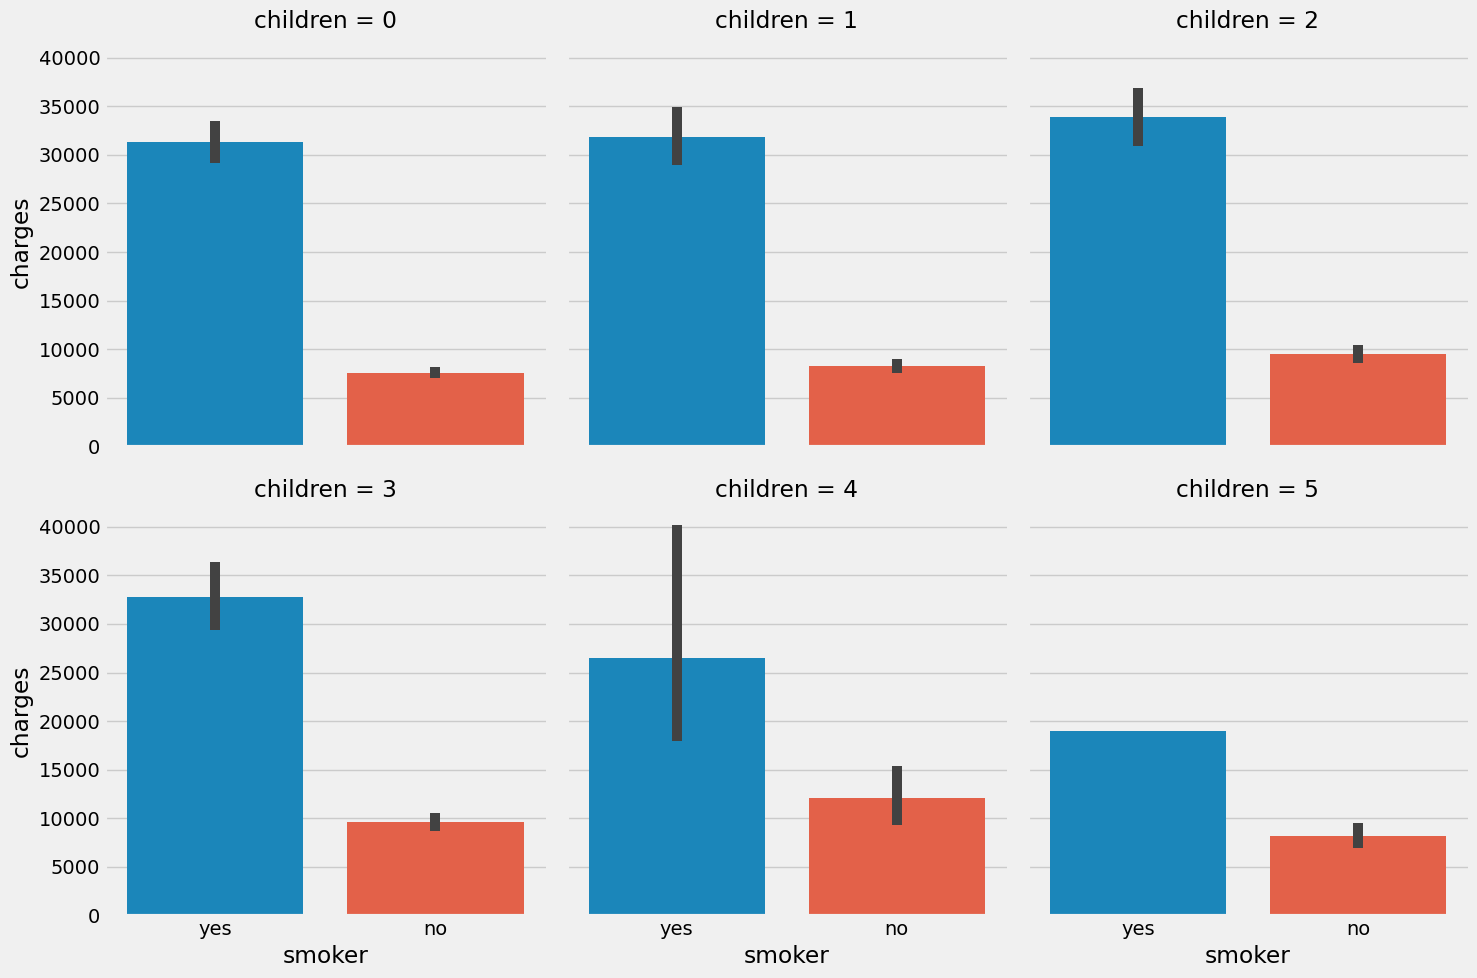

In [32]:
sns.catplot(x = 'smoker', y = 'charges', col = 'children', data = df, kind = 'bar', col_wrap = 3)
plt.show()

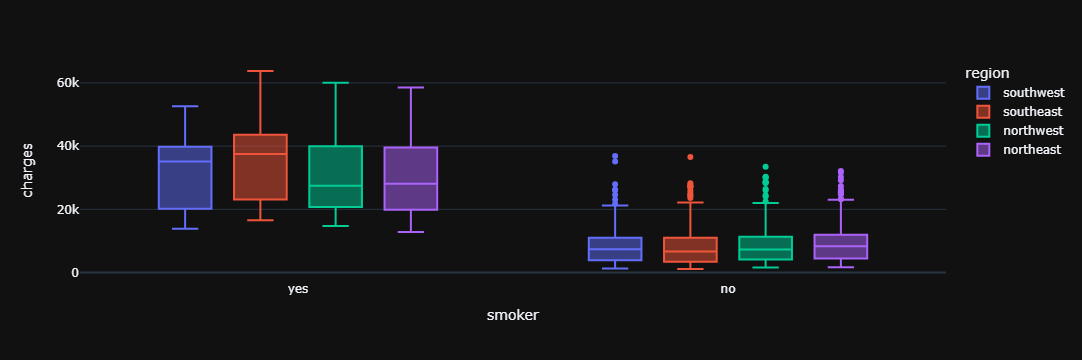

In [33]:
px.box(data_frame = df, x = 'smoker', y = 'charges', color = 'region', template = 'plotly_dark')

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Patients which are smoker pay high charges.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Highest smoker patients are from southeast region</strong></li>
</ul>

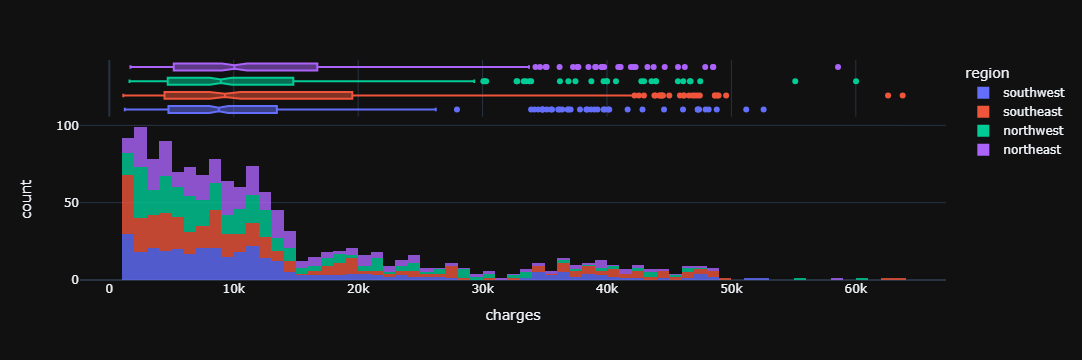

In [34]:
px.histogram(data_frame = df, x = 'charges', nbins = 100, color = 'region', marginal = 'box',
             template = 'plotly_dark', opacity = 0.8)

In [35]:
region_wise_patients = df.region.value_counts().reset_index()
region_wise_patients.columns = ['Region', 'No of patients']
region_wise_patients

Region  No of patients
0  southeast             364
1  southwest             325
2  northwest             325
3  northeast             324

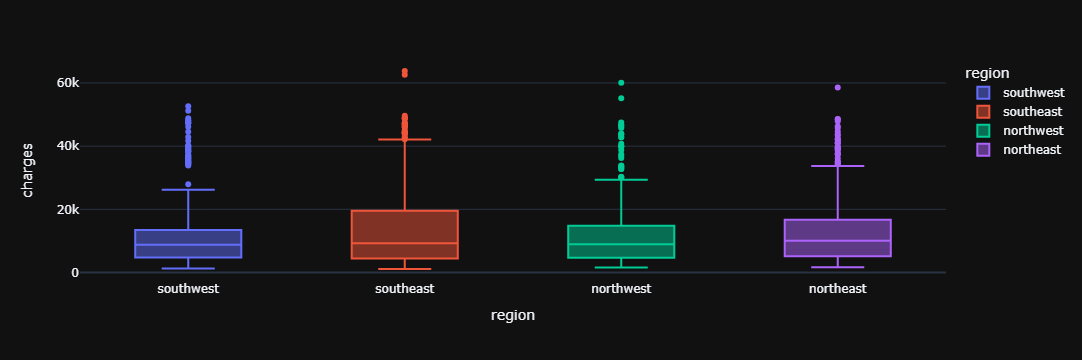

In [36]:
px.box(data_frame = df, x = 'region', y = 'charges', color = 'region', template = 'plotly_dark')

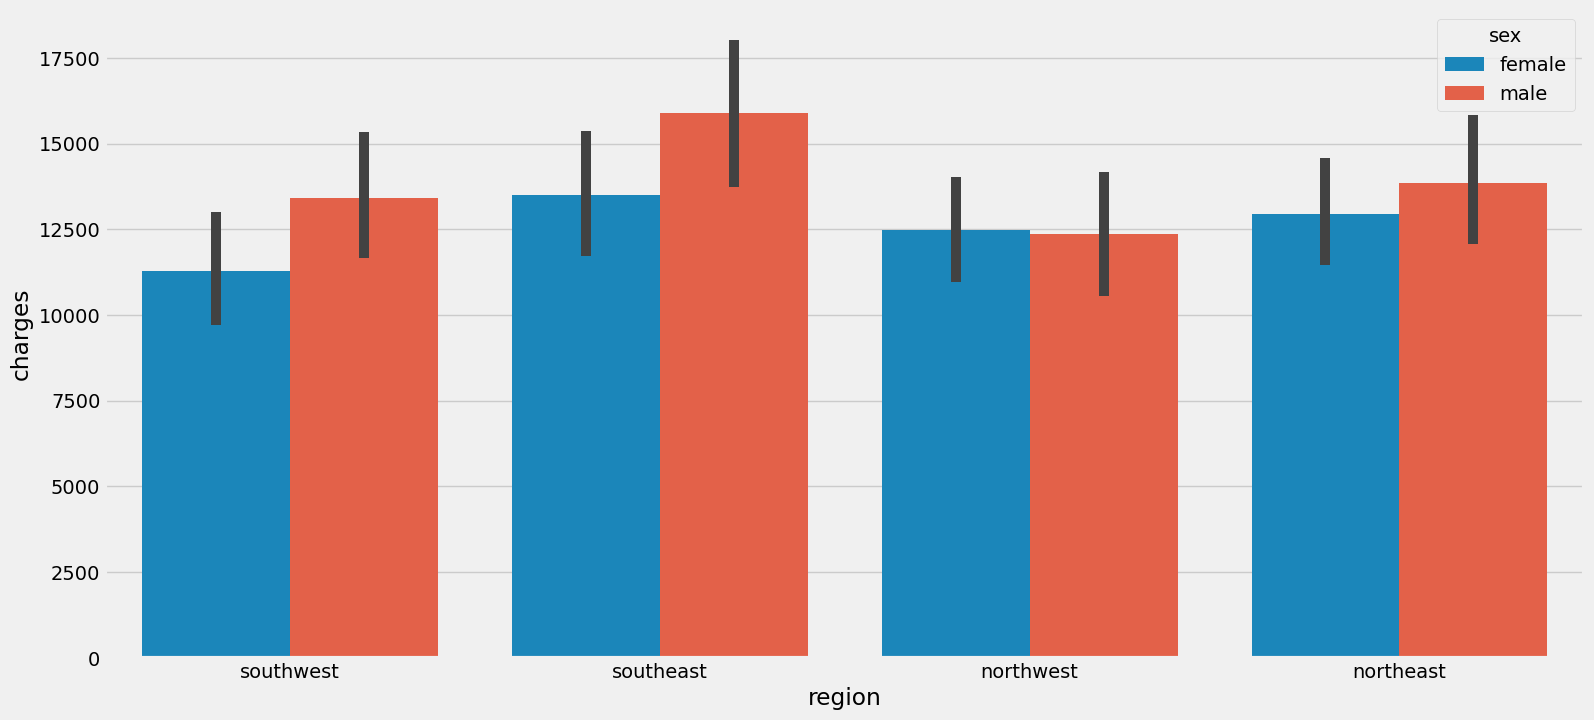

In [37]:
plt.figure(figsize = (17, 8))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df)
plt.show()

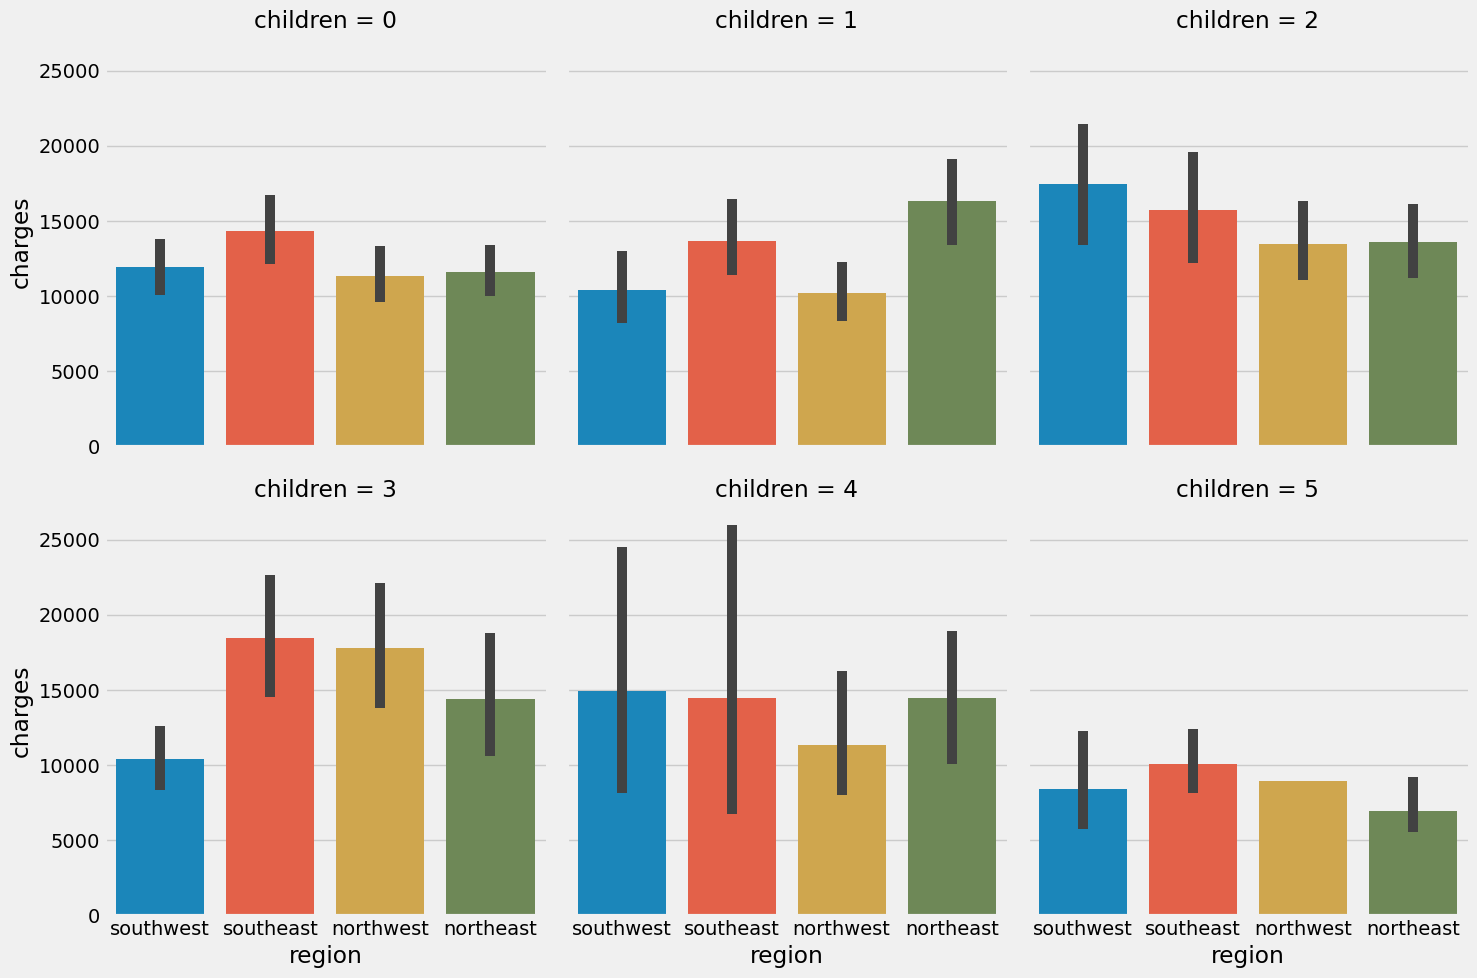

In [38]:
sns.catplot(x = 'region', y = 'charges', col = 'children', data = df, kind = 'bar', col_wrap = 3)
plt.show()

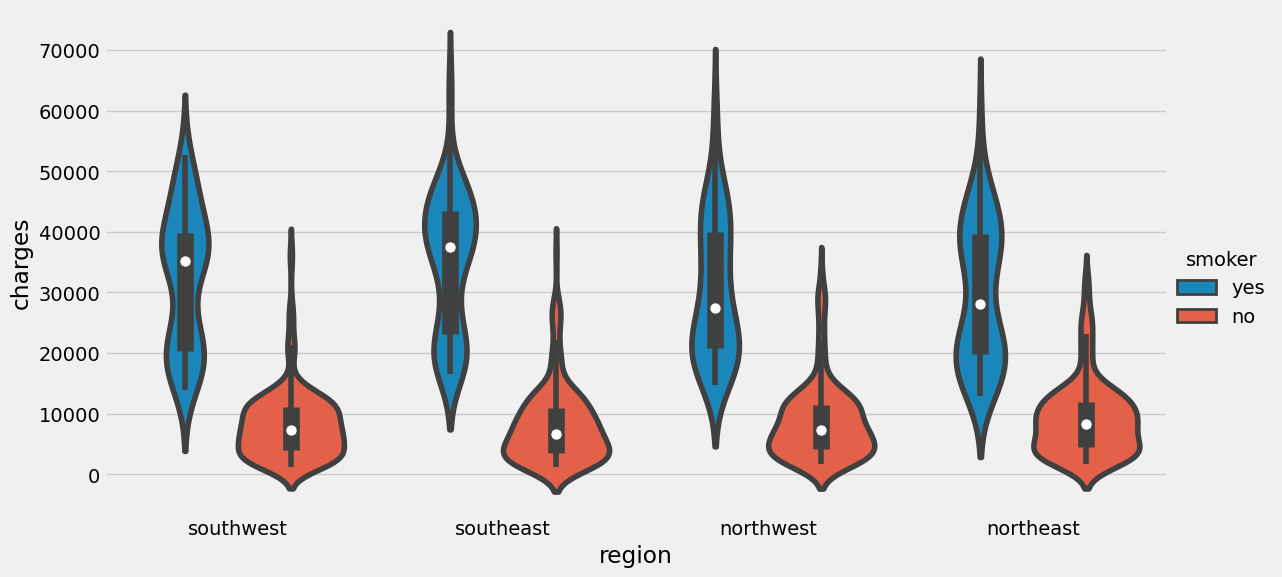

In [39]:
sns.catplot(x = 'region', y = 'charges', hue = 'smoker', data = df, kind = 'violin',
            height = 6, aspect = 2)
plt.show()

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Highest no of patients are from southeast region.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Patients from northwest and southwest region pays higher charges.</strong></li>
</ul>

<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Preprocessing</strong></p> 

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# creating column transformer (this will help us normalize/preprocess our data)

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']), 
                             (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region']))

In [41]:
# creating X and y (features and labels)

X = df.drop('charges', axis = 1)
y = df['charges']

In [42]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [43]:
# fitting column transformer on training data
ct.fit(X_train)

# transforming training and test data with normalizing (MinMaxScaler) and one hot encodig (OneHotEncoder)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

In [44]:
# creating a model using the Sequential API

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# Fit the model
model_history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11973.6953 - mae: 11973.6953
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5091.3862 - mae: 5091.3862
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3388.9224 - mae: 3388.9224
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3930.4583 - mae: 3930.4583
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3035.0178 - mae: 3035.0178
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3153.5127 - mae: 3153.5127
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3341.5471 - mae: 3341.5471
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2702.9800 - mae: 2702.9800
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2837.8774 - mae: 2837.8774
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2271.2993 - mae: 2271.2993
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2131.3364 - mae: 2131.3364
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

<p style = "font-size : 30px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Evaluating the Model</strong></p> 

In [45]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1756.7494 - mae: 1756.7494  


[1812.4827880859375, 1812.4827880859375]

<p style = "font-size : 30px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Summary</strong></p> 

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,765 (901.43 KB)

 Trainable params: 76,921 (300.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 153,844 (600.96 KB)